Päiväkohtaiset todetut korona-tartunnat ja koronaan kuolleet vaihtelevat paljon päivästä toiseen. Paremman kuvan korona-tilanteen kehittymisestä saa esimerkiksi 7 päivän liukuvista keskiarvoista.

Seuraavassa esimerkki muutamien maiden osalta. Kopioimalla koodin itsellesi ja ajamalla koodit saat tuoreimman  tilanteen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Grafiikan tyyliasetus
plt.style.use('ggplot')

# Näitä käyttäen saan kaavioiden vaaka-akselille siististi päivämääriä viikon välein
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
myLoc = MultipleLocator(7)
myFmt = DateFormatter('%d.%m')

# Ajantasaisen datan nouto
df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')

# Päivämäärät indeksiin
df.index = pd.to_datetime(df['dateRep'])
df = df.drop('dateRep', axis=1).sort_index()
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Nepal,NP,NPL,28087871.0,Asia
2019-12-31,31,12,2019,0,0,Indonesia,ID,IDN,267663435.0,Asia
2019-12-31,31,12,2019,0,0,Switzerland,CH,CHE,8516543.0,Europe
2019-12-31,31,12,2019,0,0,Qatar,QA,QAT,2781677.0,Asia
2019-12-31,31,12,2019,0,0,Canada,CA,CAN,37058856.0,America
...,...,...,...,...,...,...,...,...,...,...
2020-04-24,24,4,2020,3,0,Guam,GU,GUM,165768.0,Oceania
2020-04-24,24,4,2020,0,0,Congo,CG,COG,5244363.0,Africa
2020-04-24,24,4,2020,0,0,Trinidad_and_Tobago,TT,TTO,1389858.0,America


Text(0.5, 1.0, 'Finland')

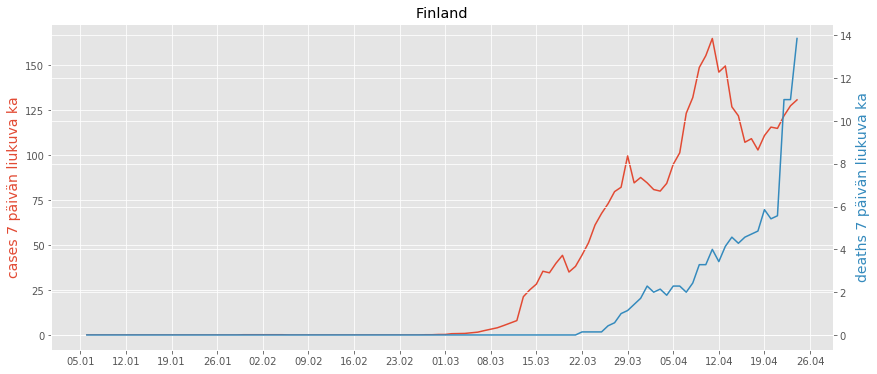

In [3]:
maa = 'Finland'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)

Text(0.5, 1.0, 'Sweden')

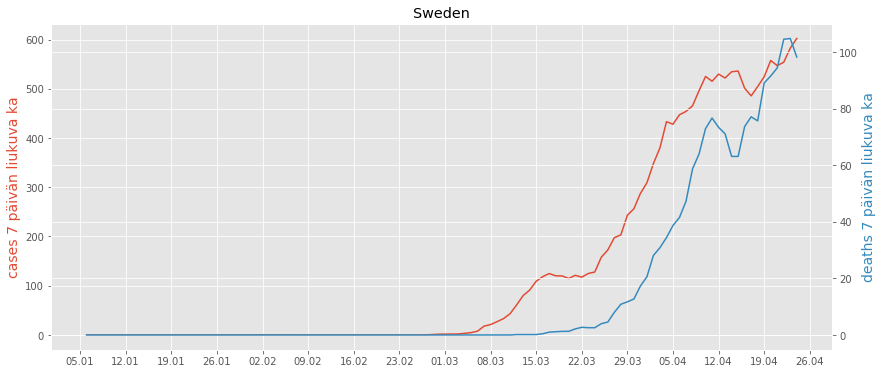

In [4]:
maa = 'Sweden'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)

Text(0.5, 1.0, 'Germany')

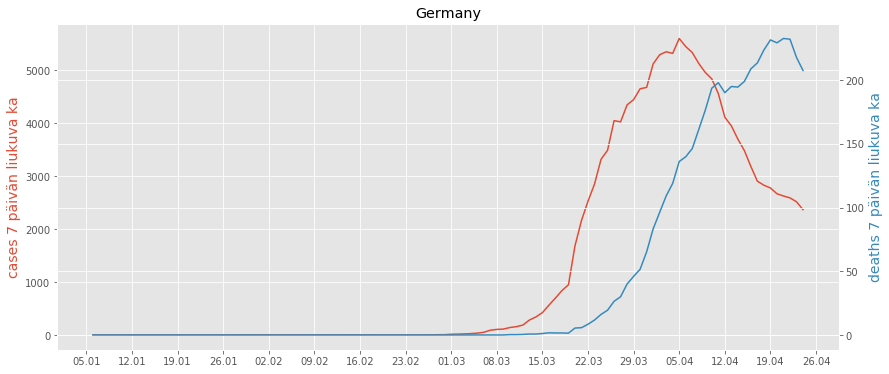

In [5]:
maa = 'Germany'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)

Text(0.5, 1.0, 'Austria')

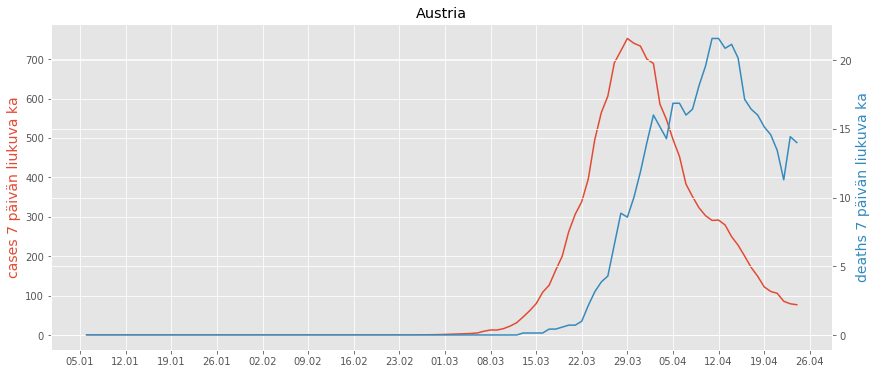

In [6]:
maa = 'Austria'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)

Text(0.5, 1.0, 'Italy')

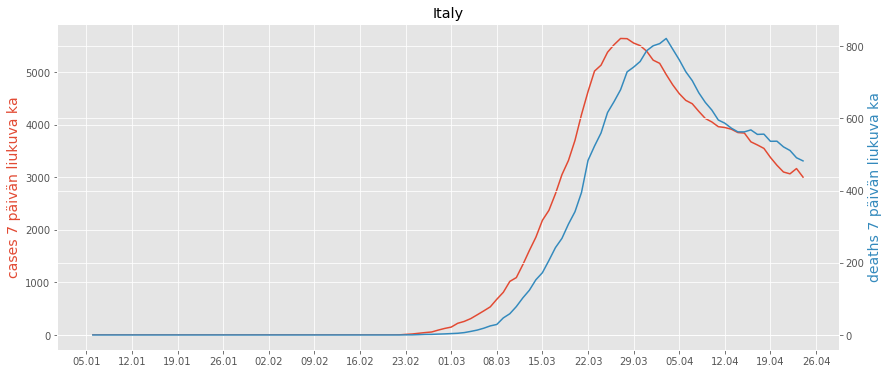

In [7]:
maa = 'Italy'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)

Text(0.5, 1.0, 'Spain')

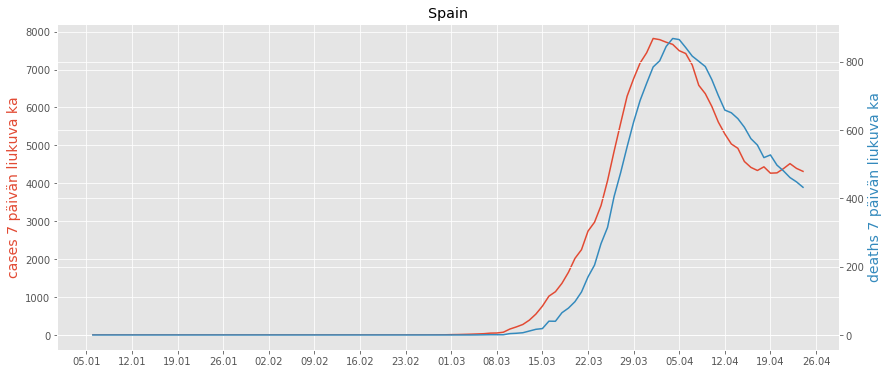

In [8]:
maa = 'Spain'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)

Text(0.5, 1.0, 'France')

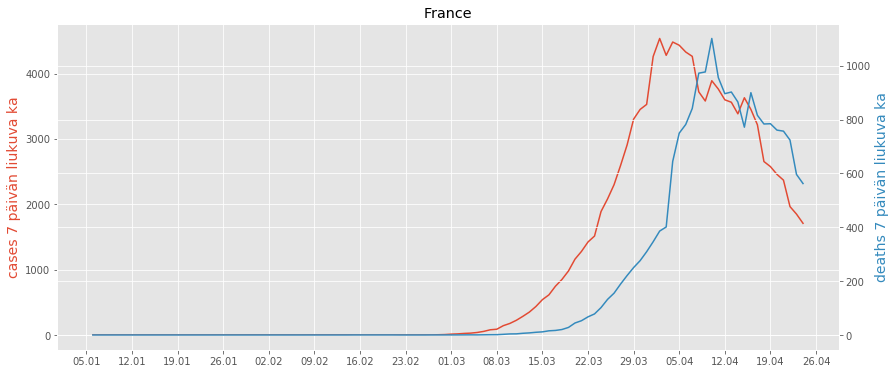

In [9]:
maa = 'France'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)

Text(0.5, 1.0, 'United_Kingdom')

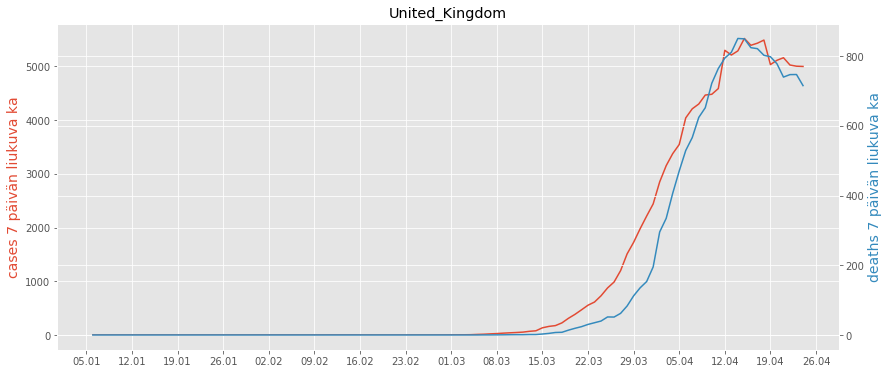

In [10]:
maa = 'United_Kingdom'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)

Text(0.5, 1.0, 'Russia')

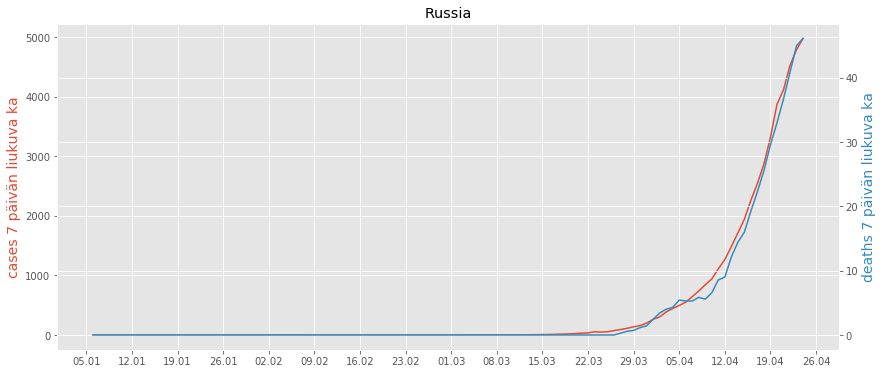

In [11]:
maa = 'Russia'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)

Text(0.5, 1.0, 'United_States_of_America')

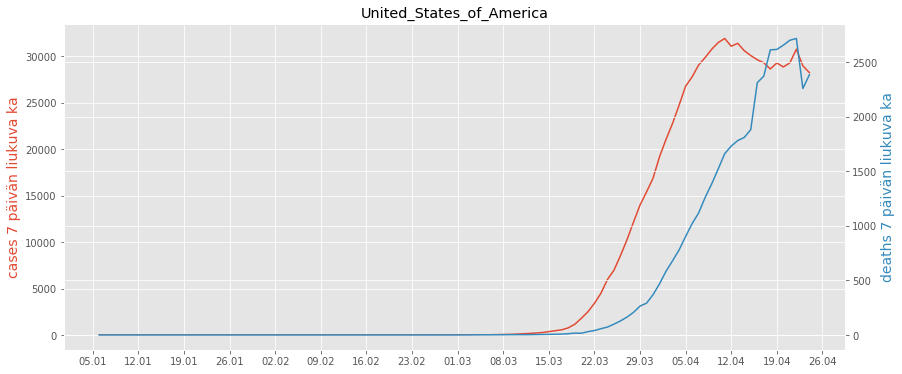

In [12]:
maa = 'United_States_of_America'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]
fig3, ax3 = plt.subplots(figsize = (14, 6))
ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')
ax3_2 = ax3.twinx()
ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')
ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_title(maa)